In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
model = keras.Sequential([
          keras.layers.Flatten(input_shape=(28, 28)),
          keras.layers.Dense(100, activation='relu'),
          keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

C:\Users\justi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8666 - loss: 0.4641
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9615 - loss: 0.1323
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9741 - loss: 0.0866
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9813 - loss: 0.0626
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9852 - loss: 0.0496


In [8]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9725 - loss: 0.0883


[0.07407232373952866, 0.9768999814987183]

In [9]:
y_predicted = model.predict(X_test)
y_predicted

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[5.74985705e-03, 3.37847683e-04, 4.02512103e-01, ...,
        9.99960065e-01, 3.86564657e-02, 8.35867077e-02],
       [1.45936077e-02, 9.42422867e-01, 9.99997199e-01, ...,
        3.27629728e-08, 9.14614320e-01, 1.38573864e-06],
       [1.57159485e-03, 9.99091208e-01, 1.28479585e-01, ...,
        3.99024040e-01, 1.21144481e-01, 5.11102565e-03],
       ...,
       [1.84834093e-07, 2.22521467e-05, 1.54682002e-05, ...,
        5.24448991e-01, 1.21740356e-01, 9.75669086e-01],
       [1.02415634e-02, 4.82096475e-05, 1.84772434e-04, ...,
        6.20851219e-02, 9.15388823e-01, 1.95725457e-04],
       [2.92611271e-01, 1.20752350e-06, 2.37221822e-01, ...,
        1.31328619e-07, 2.02243053e-03, 3.87898181e-04]], dtype=float32)

In [10]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [11]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [12]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    2,    2,    0,    2,    1,    2,    0],
       [   0, 1124,    4,    2,    0,    1,    1,    1,    2,    0],
       [   6,    3, 1004,    2,    2,    0,    2,    6,    7,    0],
       [   0,    0,    5,  998,    0,    0,    0,    1,    3,    3],
       [   0,    1,   10,    0,  957,    0,    0,    1,    2,   11],
       [   2,    0,    0,   18,    1,  860,    7,    0,    4,    0],
       [   5,    3,    3,    1,    4,    3,  933,    0,    6,    0],
       [   0,    6,    9,    3,    2,    0,    0, 1002,    0,    6],
       [   4,    1,    3,    4,    6,    3,    1,    2,  945,    5],
       [   3,    3,    0,    8,    9,    2,    1,    5,    2,  976]])>

Text(95.72222222222221, 0.5, 'Truth')

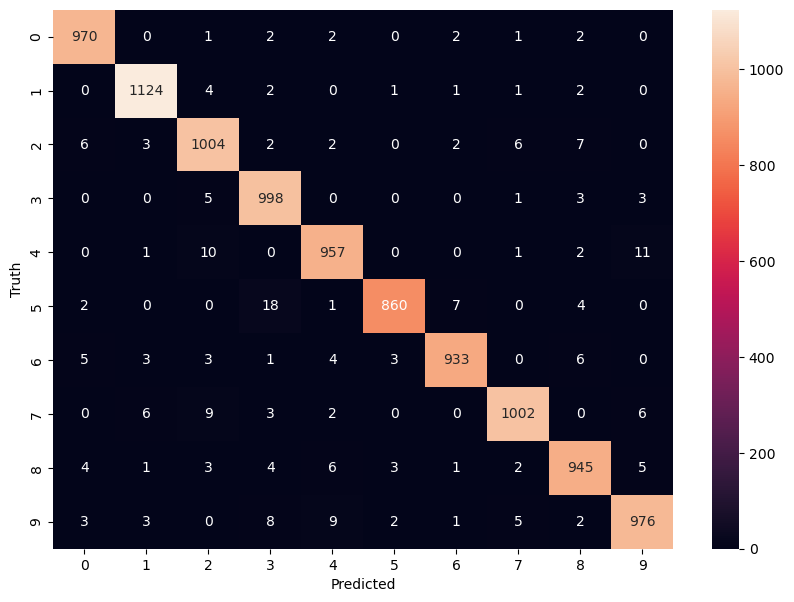

In [13]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')